# EXPOTEC TRAINING 
This is a first version of the deep learning project, I really grateful with my teacher Pedro de Lima Salomon Benites 

In [ ]:
import numpy as np #Normalizar los datos, manipular matrices, procesamiento de imágenes y en la red neuronal
import pandas as pd #Útil para la manipulación y análisis de datos
import matplotlib.pyplot as plt #Visualización de datos
from tensorflow.keras.datasets import cifar10 #Proporciona acceso al dataset CIFAR-10
from tensorflow.keras import layers, models #Construir la arquitectura de la red neuronal
from tensorflow.keras.preprocessing import image #Funciones para cargar y preprocesar imágenes nuevas para la predicción
from tensorflow.keras.models import Sequential #Construir redes neuronales de manera lineal
from tensorflow.keras.layers import Dense, Dropout, Input #Dense: Capas totalmente conectadas | Dropout: Prevenir el sobreajuste | Input: Definir la forma de entrada del modelo
from tensorflow.keras.optimizers import Adam #Optimizador que se utiliza para actualizar los pesos del modelo
from tensorflow.keras.utils import to_categorical #Convertir etiquetas de clase en formato categórico

In [ ]:
#Cargar el conjunto de datos CIFAR-10
#Divide en conjuntos de entrenamiento y prueba, asignando las imágenes y sus etiquetas a las variables correspondientes
#CIFAR-10 tiene imágenes de 32x32
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

#Imprimir tamaño del conjunto de entrenamiento
print(f"Train Size: {len(X_train)} \n Size: {len(X_train[0])}x{len(X_train[0][0])} \n {X_train[0]}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Train Size: 50000 
 Size: 32x32 
 [[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [ ]:
#Normalización de los datos
#Se cambia el tipo de dato a flotante para que sea mas preciso y se divide en 255 para que se transforme en un valor de 0 y 1, esto estabiliza y acelera el proceso de entrenamiento
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

#Imprimir tamaño del conjunto de entrenamiento y la primera imagen
print(f"Train Size: {len(X_train)} \n {len(X_train[0])} \n {X_train[0]}")

Train Size: 50000 
 32 
 [[[0.23137255 0.24313726 0.24705882]
  [0.16862746 0.18039216 0.1764706 ]
  [0.19607843 0.1882353  0.16862746]
  ...
  [0.61960787 0.5176471  0.42352942]
  [0.59607846 0.49019608 0.4       ]
  [0.5803922  0.4862745  0.40392157]]

 [[0.0627451  0.07843138 0.07843138]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509805 0.21568628]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117648 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215687 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941177 0.19607843]
  [0.47058824 0.32941177 0.19607843]
  [0.42745098 0.28627452 0.16470589]]

 ...

 [[0.8156863  0.6666667  0.3764706 ]
  [0.7882353  0.6        0.13333334]
  [0.7764706  0.6313726  0.10196079]
  ...
  [0.627451   0.52156866 0.27450982]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333334 0.07843138]]

 [[0.7058824  0.54509807 0.3764706 ]
  [0.6784314

In [ ]:
#Codificar las etiquetas en un formato de vector binario
#El dataset CIFAR-10 tiene 10 clases de imágenes por ello las etiquetas iran de 0 a 9
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

#Imprimir tamaño de las etiquetas de entrenamiento y un ejemplo
print(f"Size Train Labels: {len(y_train)} \n {y_train[2]}")

Size Train Labels: 50000 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [ ]:
#Define una arquitectura de red neuronal convolucional
data = models.Sequential([
    layers.Conv2D(96, (3, 3), strides=(1, 1), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    layers.Conv2D(384, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(384, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax'),
])

data.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 96)          │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 15, 15, 256)         │         221,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 384)           │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 7, 7, 384)           │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 7, 7, 256)           │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │       9,441,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │          40,970 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,585,290 (112.86 MB)

 Trainable params: 29,585,290 (112.86 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Compilar el modelo
data.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Entrenar el modelo
#Porque no se le puede agregar el validation_split=0.1?
data.fit(X_train, y_train, epochs=5, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 2039s 5s/step - accuracy: 0.2154 - loss: 2.0337 - val_accuracy: 0.5337 - val_loss: 1.2795
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 2008s 5s/step - accuracy: 0.5494 - loss: 1.2392 - val_accuracy: 0.6340 - val_loss: 1.0598
Epoch 3/5
266/391 ━━━━━━━━━━━━━━━━━━━━ 10:09 5s/step - accuracy: 0.6545 - loss: 0.9800

In [ ]:
#Evaluando el modelo
test_loss, test_acc = data.evaluate(X_test, y_test)
print(f"Exactitud del Test: {test_acc}")

In [ ]:
#Función para cargar y preprocesar una imagen
def carga_proceso_imagen(img_path):
    img = image.load_img(img_path, target_size=(32, 32)) #Ajustar el tamaño a 32x32
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array.astype('float32') / 255  #Normalización de la imagen
    return img_array

In [ ]:
#Definir la lista de clases del dataset CIFAR-10
class_names = [
    "Aviación (airplane)",
    "Automóviles (automobile)",
    "Pájaros (bird)",
    "Gatos (cat)",
    "Ciervos (deer)",
    "Perros (dog)",
    "Ranas (frog)",
    "Caballos (horse)",
    "Barcos (ship)",
    "Camiones (truck)"
]

#Función para predecir la clase de una imagen y mostrar el resultado
def prediccion_imagen(img_path):
    img_array = carga_proceso_imagen(img_path)
    predictions = data.predict(img_array)

    #Obtener las 5 clases con más alta probabilidad y sus probabilidades
    top_predictions = np.argsort(predictions[0])[-5:][::-1]
    top_probabilities = predictions[0][top_predictions]

    #Mostrar la imagen
    plt.imshow(image.load_img(img_path, target_size=(32, 32)))
    plt.axis('off')
    plt.show()

    #Mostrar resultados con nombres de las clases
    print("Predicciones:")
    for i, idx in enumerate(top_predictions):
        print(f'Clase: {class_names[idx]}, Probabilidad: {top_probabilities[i]:.4f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


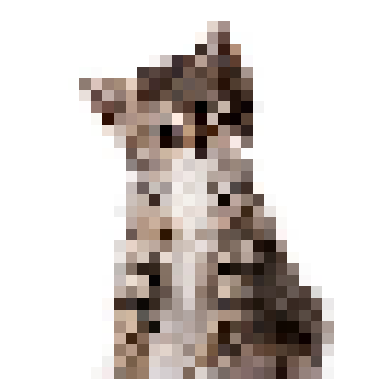

Predicciones:
Clase: Caballos (horse), Probabilidad: 0.8176
Clase: Camiones (truck), Probabilidad: 0.1058
Clase: Perros (dog), Probabilidad: 0.0277
Clase: Gatos (cat), Probabilidad: 0.0228
Clase: Aviación (airplane), Probabilidad: 0.0129


In [ ]:
#Ejemplo de uso
#Reemplaza 'ruta/a/tu/imagen.jpg' con la ruta de tu imagen
prediccion_imagen('/content/gato.jpg')